# Regression Overview Lesson

- Regression is a supervised learning technique
    - Feed features and answer in 
        - get model/algorithm out
- Target is a continuous variable 
    - for example, how much something costs
    - New evaluation metrics, like RMSE (root mean squared error)
- Same data structure
    - one column - one feature, one row - one observation
- Simple regression 
    - One feature, linear
- Multiple regression 
    - multiple features, linear
- Polynomial regression 
    - non-linear        

## Acquire

- SQL
    - Writing queries
    - Using pd.read_sql
    - Some function to generate server url
- Get to know the data
    - .info, .describe, .head, .shape
    - Histograms, countplots

## Prepare

- Null values
    - Investigate nulls 
    - Determine meaning
    - Take action (drop, impute)
    - .dropna, .isna, .value_counts
- Clean data
    - Encode categoricals as dummies (pd.get_dummies( ))
    - Change data types (.astype(
    ))
    - Tidy data
        - One observation in each row
        - One feature in each column
- Handle Outliers
    - Drop
    - Cap
- Split our data
    - train_test_split
        - test subests of original data

## Explore

- Ask questions of our data
    - Is x causing y?
- Build visualizations
- Use statistics to determine significance

## Model

- Scale the data
    - MinMaxScaler
        - makes all numbers fall between 0 and 1
    - StandardScaler 
        - makes all numbers the number of standard deviations from the mean 
    - Do not explore on scaled data
    - Do not scale target variable
- Feature engineering
    - Encode patterns
    - Combine two or more fields
        - Especially if they're highly correlated
- Feature Selection
    - RFE (recursive feature elimination)
    - Select KBest
    - Curse of Dimensionality
        - The idea that if the dimensions of your dataframe extend out significantly, the less effective the model can be
- Actual Modeling
    - Fit
    - Predict
    - Evaluate (RMSE)

# Regression Acquire and Prep Lesson (Wrangle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
df.shape

(1599, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


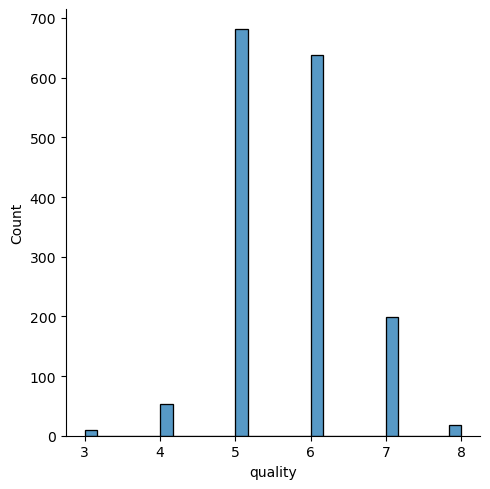

In [21]:
sns.displot(df['quality'])

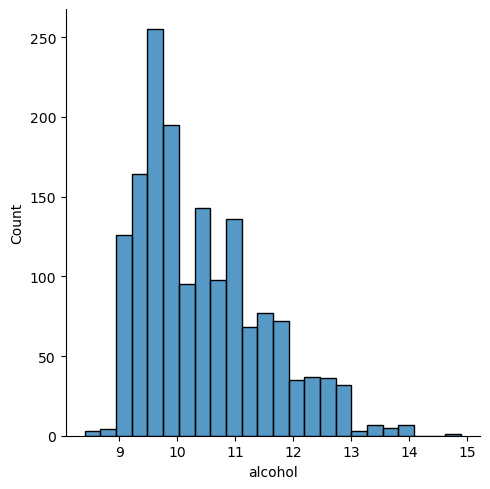

In [22]:
sns.displot(df['alcohol'])

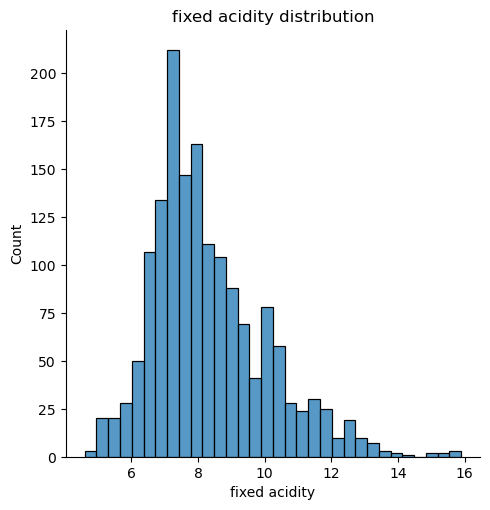

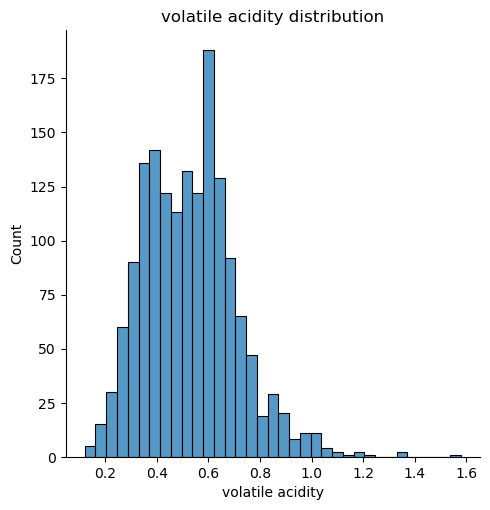

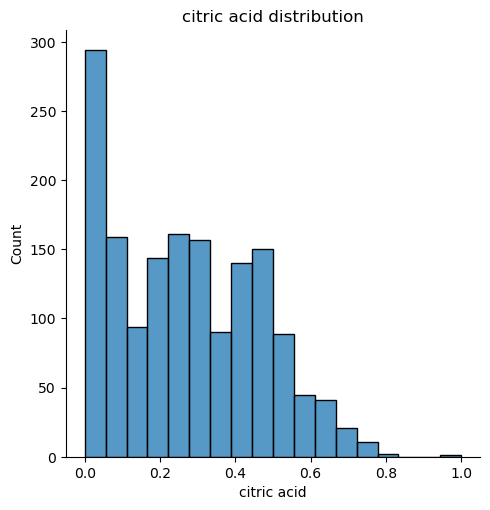

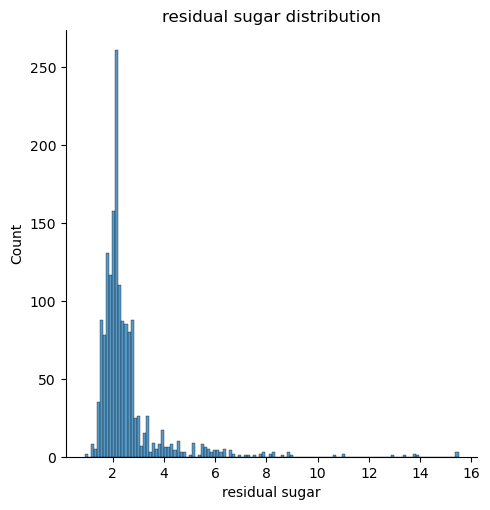

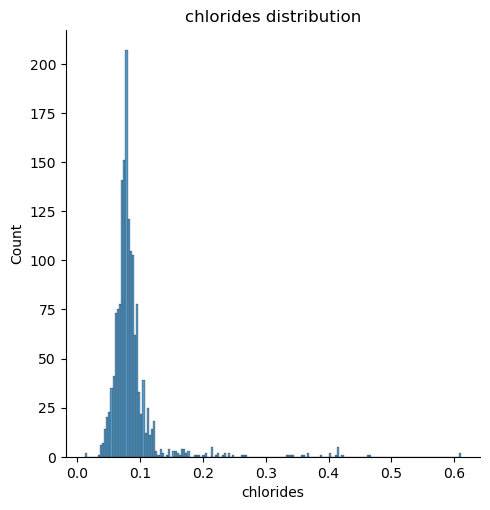

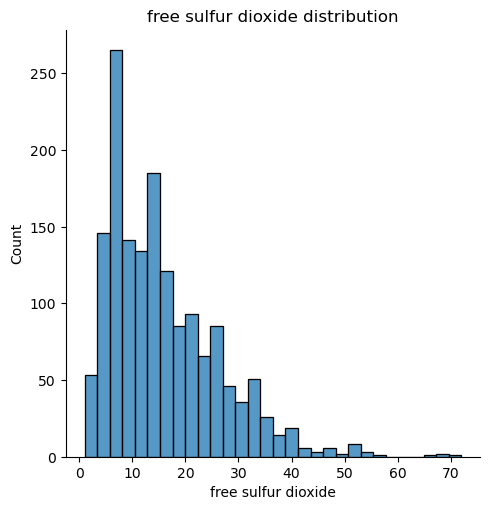

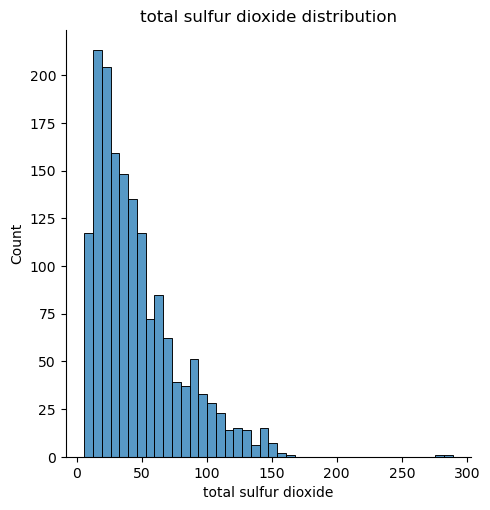

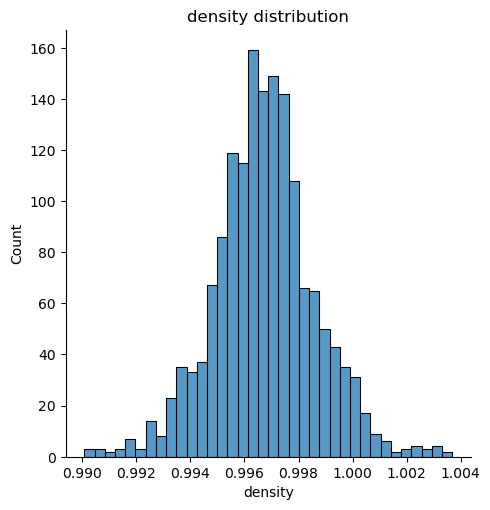

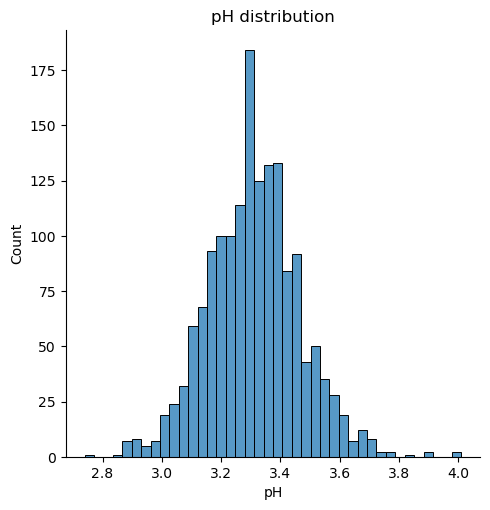

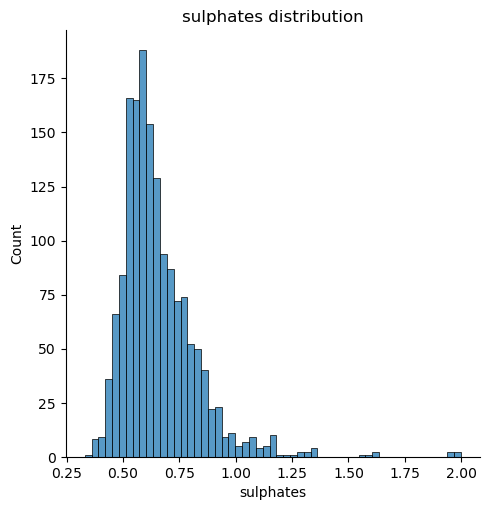

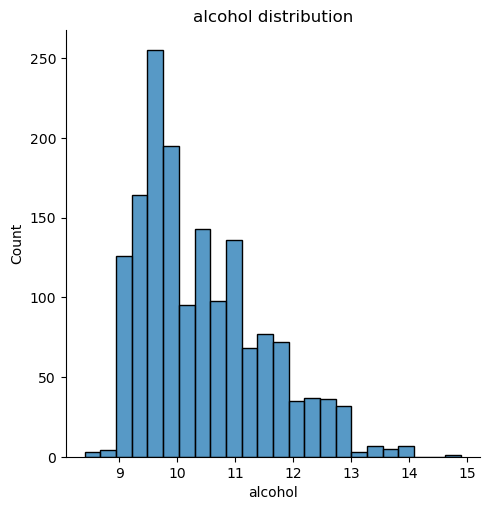

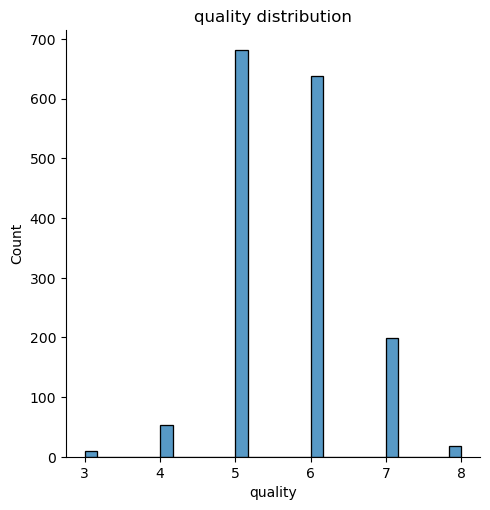

In [26]:
for col in df.columns:
    
    sns.displot(df[col])
    plt.title(f'{col} distribution')
    plt.show()

# Scaling Numeric Data 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

## Scaling

Why?
- Make data normally distributed
- Minimize model bias
- Prepare to combine features

When?
- Feature engineering
- AFTER splitting data

How?
- Features are scaled independently
- Learn parameters from train subset

Linear vs Non-Linear
- Linear maintains shape of original data
- Non-linear changes the shape of the data

In [5]:
df = pd.read_fwf('auto-mpg.data', header=None)

Data Dictionary

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [6]:
df.columns = ['mpg', 'cylinders', 'displ', 'horsepower', 
              'weight', 'acc', 'model_year', 'origin', 'model_name']

In [7]:
df

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,model_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


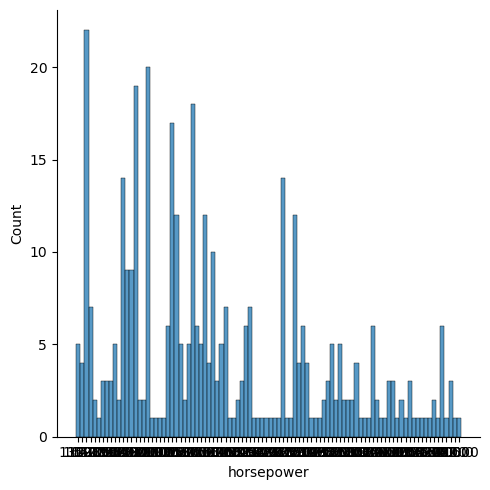

In [8]:
sns.displot(df['horsepower'])

In [9]:
df.dtypes

mpg           float64
cylinders       int64
displ         float64
horsepower     object
weight        float64
acc           float64
model_year      int64
origin          int64
model_name     object
dtype: object

In [10]:
df[df['horsepower'] == '?']

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,model_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [11]:
df = df[df['horsepower'] != '?']

In [12]:
df['horsepower'].astype(float)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [13]:
df['horsepower'] = df['horsepower'].astype('float')

/var/folders/zk/vf208zwx67vf8nf5b5xtyllw0000gn/T/ipykernel_4638/2841366042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype('float')


## Min-Max Scaling

In [14]:
train, test = train_test_split(df, train_size=0.7, random_state=42)
train.shape, test.shape

((274, 9), (118, 9))

In [15]:
def split_train_test(df, col=None):
    '''
    This function takes in a DataFrame, along with a target column (variable), and split it into train, validate, test subsets for our modeling phase.
    '''
    seed = 42
    train, val_test = train_test_split(df, train_size=.5, random_state=seed)
    validate, test = train_test_split(val_test, train_size=.6, random_state=seed)
    
    return train, validate, test

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mm_scaler = MinMaxScaler()

In [18]:
mm_scaler.fit(train[['horsepower']])

MinMaxScaler()

In [19]:
mm_horsepower = mm_scaler.transform(train[['horsepower']])

In [20]:
train['horsepower'].head()

110     94.0
17      85.0
320     92.0
24      90.0
128    100.0
Name: horsepower, dtype: float64

In [21]:
mm_horsepower[:5]

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

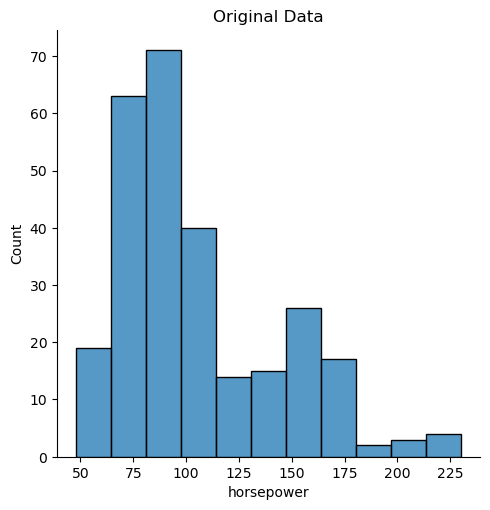

In [25]:
sns.displot(train['horsepower'])
plt.title('Original Data')
plt.show()

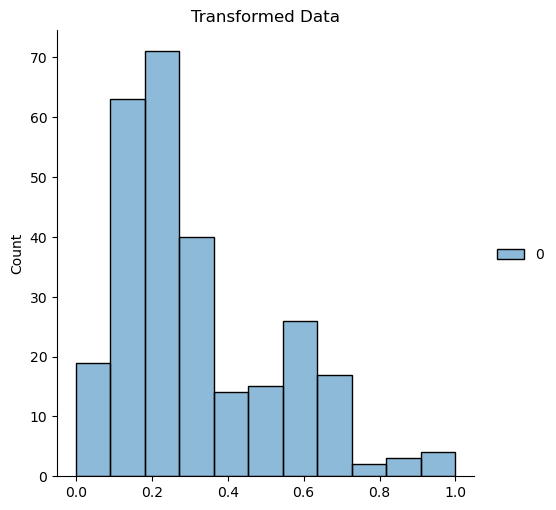

In [26]:
sns.displot(mm_horsepower)
plt.title('Transformed Data')
plt.show()

## Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
s_scaler = StandardScaler()

In [29]:
s_scaler.fit(train[['horsepower']])

StandardScaler()

In [30]:
ss_horsepower = s_scaler.transform(df[['horsepower']])
ss_horsepower[:5]

array([[0.65984314],
       [1.57932814],
       [1.18526314],
       [1.18526314],
       [0.92255314]])

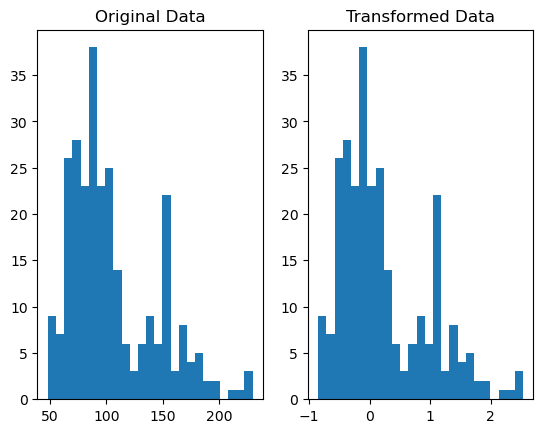

Text(0.5, 1.0, 'Transformed Data')

In [48]:
plt.subplot(121)
plt.hist(train['horsepower'], bins=25)
plt.title('Original Data')
plt.show()

plt.subplot(122)
plt.hist(ss_horsepower, bins=25)
plt.title('Transformed Data')

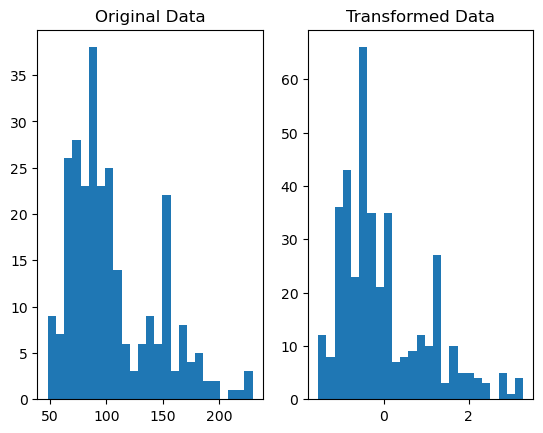

In [60]:
compare_plots(rs_horsepower, train, 'horsepower')

## Robust Scaler

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
rs_scaler = RobustScaler()

In [37]:
rs_scaler.fit(train[['horsepower']])

RobustScaler()

In [39]:
rs_horsepower = rs_scaler.transform(train[['horsepower']])

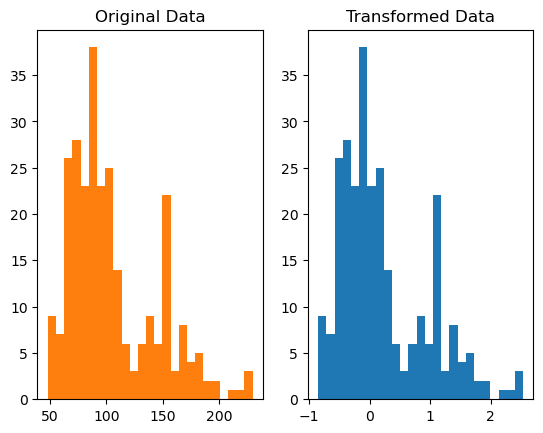

In [47]:
compare_plots(rs_horsepower)

In [49]:
rs_scaler.fit(train[['horsepower', 'weight']])

RobustScaler()

In [53]:
double_trouble = rs_scaler.transform(train[['horsepower', 'weight']])

In [54]:
double_trouble[:10]

array([[ 0.00930233, -0.31836291],
       [-0.15813953, -0.16769286],
       [-0.02790698, -0.27852227],
       [-0.06511628, -0.12350598],
       [ 0.12093023,  0.37486418],
       [-0.4744186 , -0.61463238],
       [ 0.02790698, -0.09018472],
       [-0.10232558, -0.05686346],
       [-0.77209302, -0.56754799],
       [-0.28837209, -0.45526983]])